In [23]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotting_fxns import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
glacier = 'Gulkana'
id = '11'
date = str(pd.Timestamp.today()).replace('-','_')[0:10]
# date=  '2024_07_09'
data_fp = f'/home/claire/research/Output/EB/{glacier}_{date}_#.nc'
ds,startdate,enddate = getds(data_fp.replace('#',id))
# base_fp = f'/home/claire/research/Output/EB/Gulkana_2024_05_07_3.nc'
# base_ds,_,_ = getds(base_fp)
stake_df = pd.read_csv('~/research/MB_data/Stakes/gulkanaAB23_ALL.csv')
stake_df.index = pd.to_datetime(stake_df['Date'])
temp_df = pd.read_csv('~/research/MB_data/Gulkana/field_data/iButton_2023_all.csv',index_col=0)
temp_df = temp_df.set_index(pd.to_datetime(temp_df.index) - pd.Timedelta(hours=8))

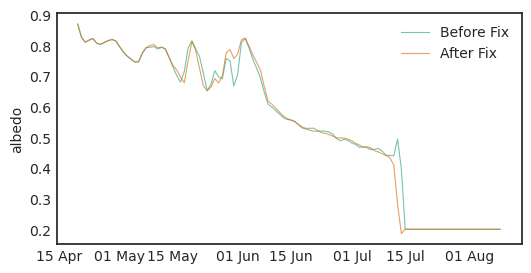

In [27]:
compare_runs([ds1,ds],[startdate,enddate],['Before Fix','After Fix'],'albedo')

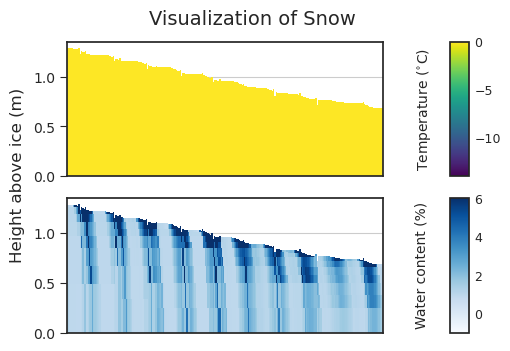

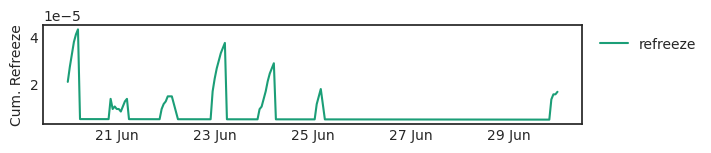

In [30]:
visualize_layers(ds,0,pd.date_range('2004-06-20 00:30','2004-06-30 00:30',freq='h'),['layertemp','layerwater'])
# plot_single_layer(ds,0,['layertemp','layerwater'],['2004-04-20 00:30','2004-04-30 00:30'])
simple_plot(ds,0,['2004-06-20 00:30','2004-06-30 00:30'],[['refreeze']],res='h',cumMB=False)

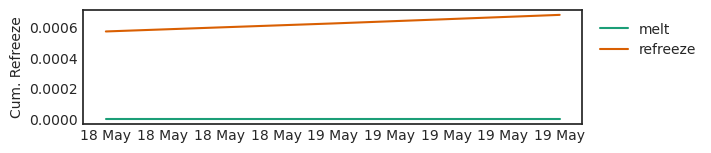

In [31]:
simple_plot(ds,0,['2004-05-18 22:30','2004-05-19 02:30'],[['melt','refreeze']],res='h')


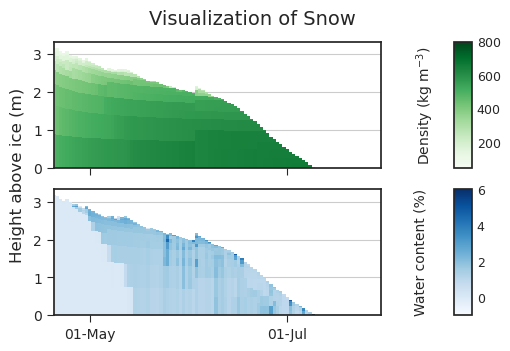

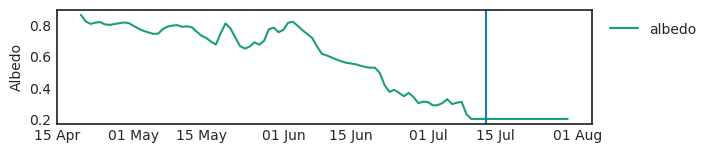

In [17]:
visualize_layers(ds,0,pd.date_range('2004-04-20 00:30','2004-07-30 00:30',freq='d'),['layerdensity','layerwater'])
simple_plot(ds,0,['2004-04-20 00:30','2004-07-30 00:30'],[['albedo']])
# plot_single_layer(ds,0,['layerBC','layerdust'],[startdate,enddate])

1467.3745454545453
1290.8211764705882


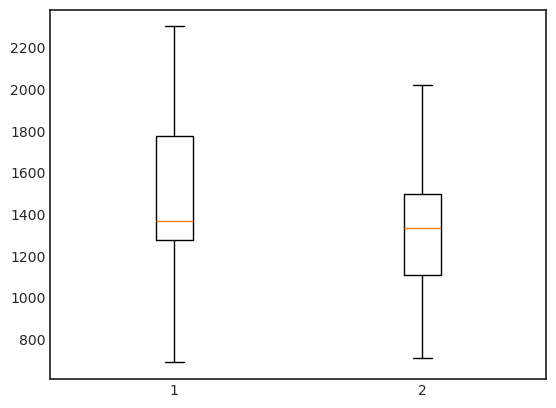

In [60]:
wolverine = pd.read_csv('/home/claire/research/climate_data/AWS/Benchmark/wolverine/LVL2/wolverine990_daily_LVL2.csv')
gulkana = pd.read_csv('/home/claire/research/climate_data/AWS/Gulkana/LVL2/gulkana1480_daily_LVL2.csv')
wolverine.index = pd.to_datetime(wolverine['Date'])
gulkana.index = pd.to_datetime(gulkana['Date'])
# print(wolverine['Date'].iloc[0],wolverine['Date'].iloc[-1])
# print(gulkana['Date'].iloc[0],gulkana['Date'].iloc[-1])
wolverine['Precip_Weighing_Incremental'] = wolverine['Precip_Weighing_Incremental'].fillna(wolverine['Precip_Stage_Incremental']*2.28) #, inplace=True)
gulkana['Precip_Weighing_Incremental'] = gulkana['Precip_Weighing_Incremental'].fillna(gulkana['Precip_Stage_Incremental']*1.48) #, inplace=True)
dates = np.concatenate([pd.date_range('2000-01-01','2015-12-31'),
                       pd.date_range('2017-01-01','2018-12-31')])
wolverine = wolverine.loc[dates]
gulkana = gulkana.loc[pd.date_range('2000-01-01','2018-12-31')]
wolverine = wolverine['Precip_Weighing_Incremental'].resample('YS').sum().to_numpy()
gulkana = gulkana['Precip_Weighing_Incremental'].resample('YS').sum().to_numpy()
print(np.mean(wolverine[wolverine != 0.]))
print(np.mean(gulkana[gulkana != 0.]))
plt.boxplot([wolverine[wolverine != 0.],gulkana[gulkana != 0.]])
plt.show()

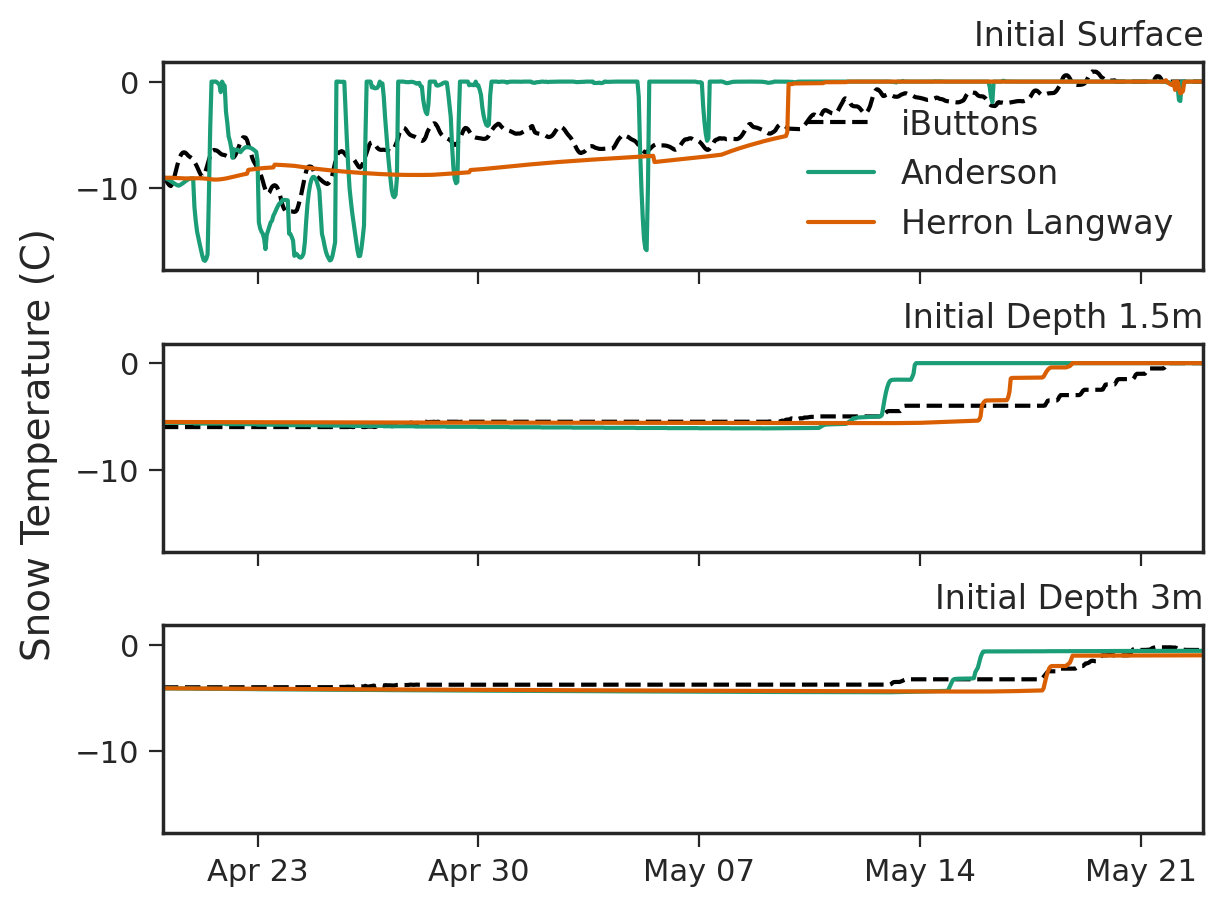

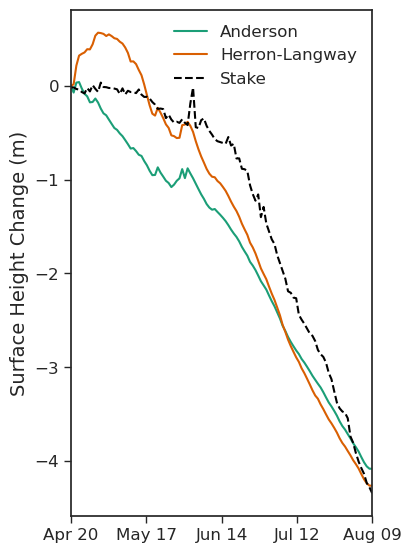

In [44]:
dsboone,startdate,enddate = getds(data_fp.replace('#','0'))
dsherron,_,_ = getds(data_fp.replace('#','1'))
temp_vs_iButton([dsboone,dsherron],temp_df,[startdate,enddate],0,plot_heights=[3.5,1.5,.5],labels=['Anderson','Herron Langway'],ax_titles=['Initial Surface','Initial Depth 1.5m','Initial Depth 3m'],t='')
plt.savefig('/home/claire/research/snowtemps.png',dpi=200)
dh_vs_stake(stake_df,[dsboone,dsherron],[startdate,enddate],['Anderson','Herron-Langway'],t='')
plt.savefig('/home/claire/research/dh_compare.png',dpi=200)

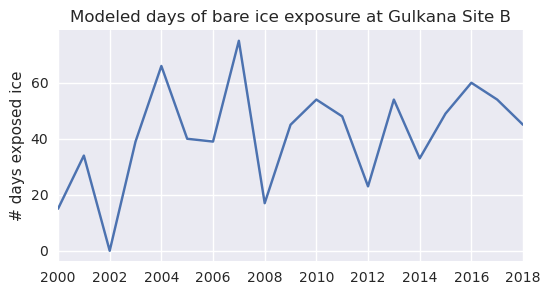

In [14]:
store = []
fig,ax = plt.subplots(figsize=(6,3))
for year in range(2000,2019):
    start = pd.to_datetime(str(year)+'-06-15 00:30')
    end = pd.to_datetime(str(year)+'-10-30 00:30')
    dates = pd.date_range(start,end,freq='h')
    density = ds.layerdensity.sel(time=dates,bin=0).resample(time='d').mean()
    ice_days = density.sel(layer=0).values > 700
    store.append(sum(ice_days))
ax.plot(np.arange(2000,2019),store)
ax.set_ylabel('# days exposed ice')
ax.set_xticks(np.arange(2000,2019,2).astype(int))
ax.set_xlim(2000,2018)
ax.set_title('Modeled days of bare ice exposure at Gulkana Site B')
plt.show()

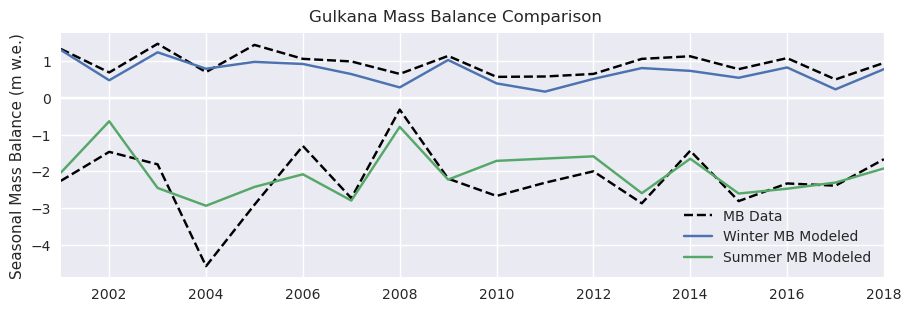

In [108]:
ds,startdate,enddate = getds('~/research/Output/EB/Gulkana_2024_05_28_1.nc')
mb_fp = '/home/claire/research/MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv'
ds_list = [ds]
years = np.arange(2001,2019)
site = 'B'
mb_df = pd.read_csv(mb_fp)
# start func
fig,ax = plt.subplots(figsize=(9,3),sharex=True,layout='constrained')
mb_df = mb_df.loc[mb_df['site_name'] == site]
mb_df.index = mb_df['Year']

# plot mass balance data
winter_mb_data = mb_df['bw'].loc[mb_df['Year'].isin(years)]
summer_mb_data = mb_df['ba'].loc[mb_df['Year'].isin(years)] - mb_df['bw'].loc[mb_df['Year'].isin(years)]
ax.plot(years,winter_mb_data,label='MB Data',color='black',linestyle='--')
ax.plot(years,summer_mb_data,color='black',linestyle='--')

mb_mod = {'bw':[],'bs':[]}
for ds in ds_list:
    for year in years:
        # spring_date = mb_df['spring_date'].loc[year]
        # fall_date = mb_df['fall_date'].loc[year]
        # next_spring_date = mb_df
        spring_date = str(year)+'-04-20 00:00'
        fall_date = str(year)+'-08-20 00:00'
        next_spring_date = str(year)+'-04-20 00:00'
        last_fall_date = str(year-1)+'-08-20 00:00'
        melt_dates = pd.date_range(spring_date,fall_date,freq='h')
        acc_dates = pd.date_range(last_fall_date,spring_date,freq='h')
        if pd.to_datetime(ds.time.values[0]).minute == 30:
            melt_dates = melt_dates + pd.Timedelta(minutes=30)
            acc_dates = acc_dates + pd.Timedelta(minutes=30)
        # sum mass balance
        wds = ds.sel(time=acc_dates).sum()
        sds = ds.sel(time=melt_dates).sum()
        winter_mb = wds.accum + wds.refreeze - wds.melt
        summer_mb = sds.accum + sds.refreeze - sds.melt
        mb_mod['bw'].append(winter_mb.to_numpy())
        mb_mod['bs'].append(summer_mb.to_numpy())
    ax.plot(years,mb_mod['bw'],label='Winter MB Modeled')
    ax.plot(years,mb_mod['bs'],label='Summer MB Modeled')
ax.legend()
ax.axhline(0,color='white')
ax.set_ylabel('Seasonal Mass Balance (m w.e.)')
ax.set_xlim(2001,2018)
ax.set_xticks(np.arange(2002,2020,2))
fig.suptitle('Gulkana Mass Balance Comparison')
# plt.show()
plt.savefig('/home/claire/research/20yrfig.png',dpi=200)

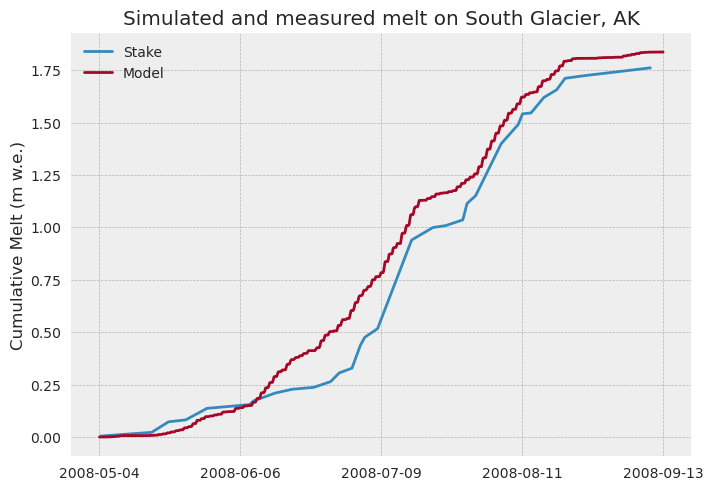

In [65]:
ds,startdate,enddate = getds(data_fp.replace('#','12'))
df = pd.read_csv('/home/claire/research/MB_data/South/stakes.csv',index_col=0)
df.index = pd.to_datetime(df.index)
# start = pd.to_datetime('2008-07-22 00:30')
# df = df.loc[start:] - 1.02
# ds = ds.sel(time=pd.date_range(start,enddate,freq='h'))
plt.plot(df.index,df['Melt'],label='Stake')
# ds = ds.resample(time='d').sum()
plt.plot(ds.coords['time'],ds['melt'].cumsum(),label='Model')

# plt.plot(ds_MERRA.coords['time'],ds_MERRA['melt'].cumsum(),label='Model (MERRA)')
# plt.plot(ds_AWS.coords['time'],ds_AWS['melt'].cumsum(),label='Model (AWS)')
plt.ylabel('Cumulative Melt (m w.e.)')
plt.xticks(pd.date_range(startdate,enddate,periods=5))
plt.title('Simulated and measured melt on South Glacier, AK')
plt.legend()

This notebook is intended to make plotting of the PyGEM-EB output straightforward for fast diagnostics after a model run. Most functions just need the information for the model run in the cell below. 

Specify the plotting style to use and the figure name to save the plot.

Run the following cells to plot the data. For information on any of the plotting functions, run 'help(name_of_function)'. Available functions are:
- simple_plot
- plot_AWS
- plot_stake_data
- compare_runs
- stacked_eb_barplot

In [9]:
labels = []
params = {
    'kp':[0.5,0.8],
    'albedo_ice':[0.1,0.3],
    'k_ice':[1,4],
    'ksp_BC':[0.01,0.8]
}
for kp in params['kp']:
    for aice in params['albedo_ice']:
        for ksp in params['ksp_BC']:
            for k_ice in params['k_ice']:
                labels.append(f'kp: {kp}, a_ice: {aice}, ksp_BC: {ksp}, k_ice: {k_ice}')
stake_df = pd.read_csv('~/research/MB_data/Stakes/gulkanaAB23_ALL.csv')
stake_df.index = pd.to_datetime(stake_df['Date'])

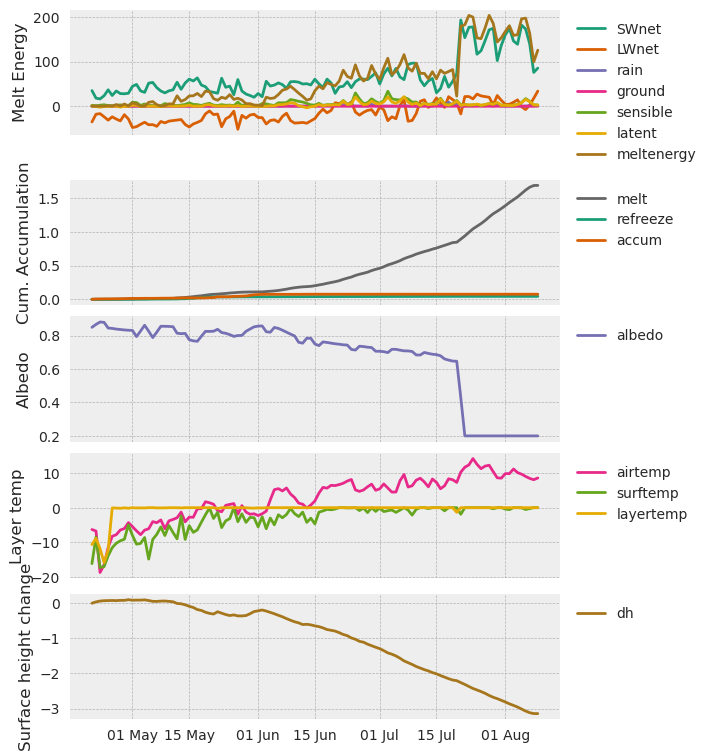

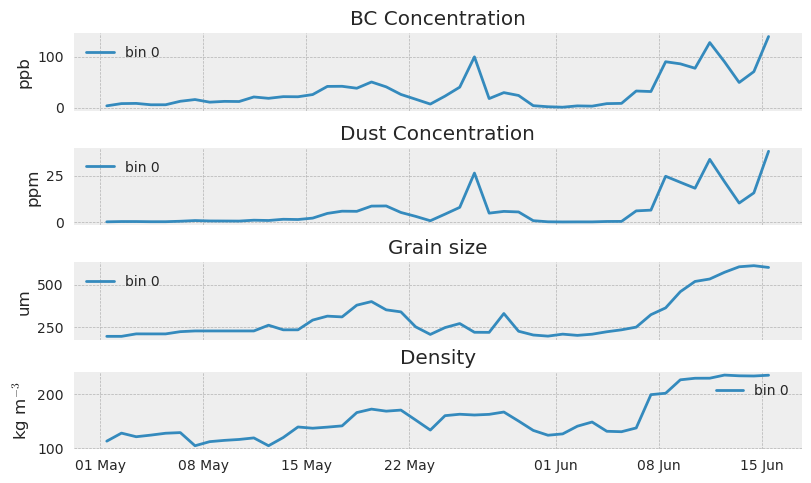

In [35]:
# from plotting_fxns import *
ds,startdate,enddate = getds('~/research/Output/EB/Gulkana_2024_03_13_BASE.nc') # 3_08_1
stake_df = pd.read_csv('~/research/MB_data/Stakes/gulkanaAB23_ALL.csv')
stake_df = stake_df.set_index(pd.to_datetime(stake_df['Date']))
# plot_stake_dh(stake_df,[ds],[startdate,enddate],['ds'])
dates = pd.date_range(startdate,enddate,freq='3d')
all = [['SWnet','LWnet','rain','ground','sensible','latent','meltenergy'],
       ['melt','refreeze','accum'],
       ['albedo'],
       ['airtemp','surftemp','layertemp'],
       ['dh']]
simple_plot(ds,0,[startdate,enddate],all)
plot_single_layer(ds,0,['layerBC','layerdust','layergrainsize','layerdensity'],['2023-05-01 10:30','2023-06-15 10:30'],resample=False,res='d')
# for var in ['layerBC','layertemp','layerdensity']: # 
#     # for bin in range(3):
#     for bin in [0]:
#         visualize_layers(ds,bin,dates,var,plot_firn=False)

In [19]:
switches = ['000','010','001','110','020','021','120','121']
fp = '/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_02_02_'
ds_list = []
label_list = []
for switch in switches:
    ds,_,_ = getds(fp+switch+'.nc')
    ds_list.append(ds)
    label_list.append(switch)

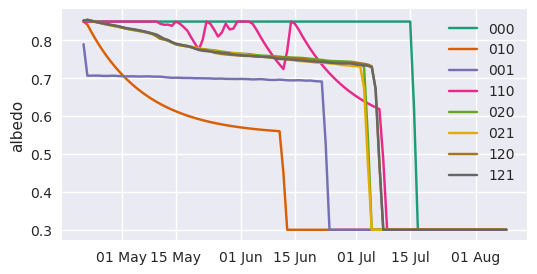

In [20]:
compare_runs(ds_list,[startdate,enddate],label_list,'albedo')

In [15]:
param_options = {
          'lapserate':{'options':[-0.003,-0.01],'value':-0.0065,'units':'K m-1'},
          'k_ice':{'options':[1.5,3],'value':2.33,'units':'W K-1 m-1'},
          'precgrad':{'options':[5e-6,5e-4],'value':0.0001,'units':''},
          'kp':{'options':[0.5,2],'value':1,'units':''},
          'albedo_ice':{'options':[0.2,0.4],'value':0.3,'units':''},
          'roughness_ice':{'options':[0.5,3],'value':1.7,'units':'mm'},
          'ksp_BC':{'options':[0.01,0.8],'value':0.1,'units':'kg kg-1'},
          'ksp_dust':{'options':[0.001,0.08],'value':0.015,'units':'kg kg-1'},
          'dz_toplayer':{'options':[0.01,0.05],'value':0.03,'units':'m'},
          'layer_growth':{'options':[0.6,0.9],'value':0.6,'units':''},
          'roughness_aging_rate':{'options':[0.04,0.08],'value':0.06267,'units':'mm d-1'},
          'dry_metamorphism_rate':{'options':[1e-5,1e-4],'value':3.5e-5,'units':'um s-1'}
          }
filename = '/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_03_13_VAR_VALUE.nc'

ds_dict = {}
for key in list(param_options.keys()):
    for value in param_options[key]['options']:
        fn = filename.replace('VAR',key).replace('VALUE',str(value))
        ds,startdate,enddate = getds(fn)
        ds_dict[key+'='+str(value)] = ds

# ds,startdate,enddate = getds('/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_01_22_0.nc')
# ds_dict['LAPbins=yes'] = ds
# ds,startdate,enddate = getds('/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_01_22_noLAPbins.nc')
# ds_dict['LAPbins=no'] = ds

Date
2023-04-18    217.98
2023-04-19    217.63
2023-04-20    217.11
2023-04-21    215.82
2023-04-22    215.11
               ...  
2023-08-19      0.00
2023-08-20      0.00
2023-08-21      0.00
2023-08-22      0.00
2023-08-23      0.00
Name: snow_depth, Length: 128, dtype: float64


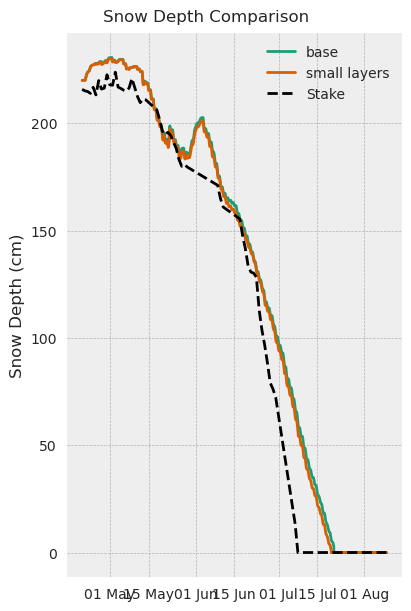

In [25]:
ds_base,_,_ = getds('~/research/Output/EB/Gulkana_2024_03_13_BASE.nc')
ds_small,_,_ = getds('~/research/Output/EB/Gulkana_2024_03_13_2.nc')
plot_stake_dh(stake_df,[ds_base,ds_small],[startdate,enddate],['base','small layers'])
plot_stake_snowdepth(stake_df,[ds_base,ds_small],[startdate,enddate],['base','small layers'])

/home/claire/research/PyGEM-EB/pygem_eb/processing/plotting_fxns.py:436: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


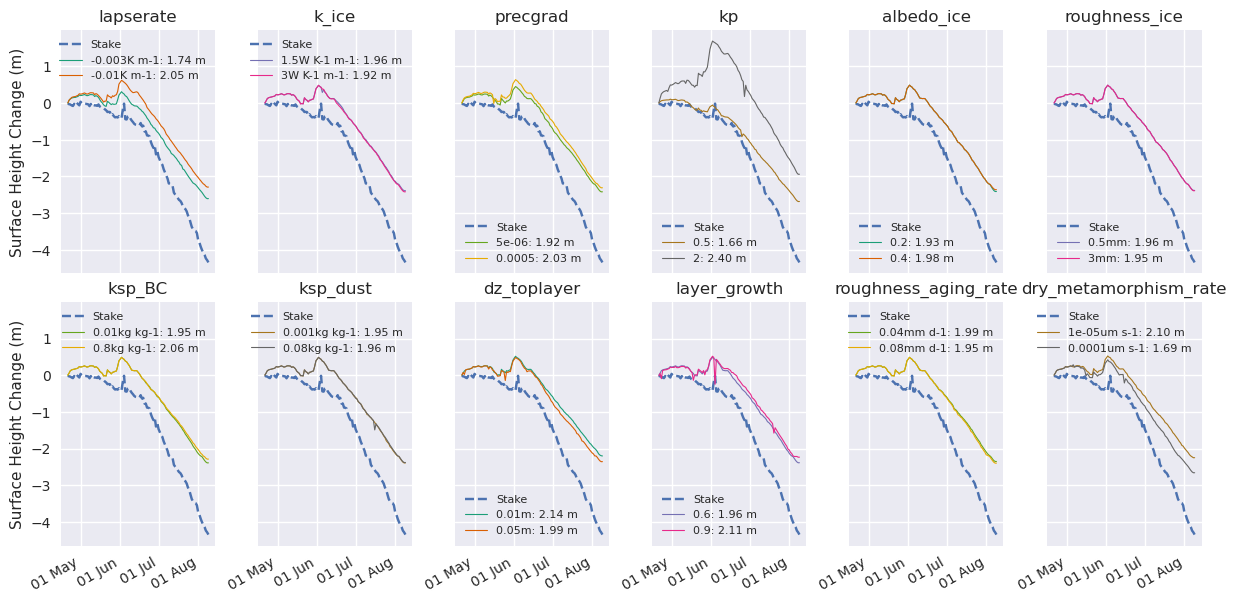

In [19]:
ds_list = list(ds_dict.values())
labels = list(ds_dict.keys())
stake_df = pd.read_csv('~/research/MB_data/Stakes/gulkanaAB23_GNSSIR.csv')
stake_df = stake_df.set_index(pd.to_datetime(stake_df['Date']))
units = [param_options[label.split('=')[0]]['units'] for label in labels]
panel_dh_compare(ds_list,[startdate,enddate],labels,units,stake_df)

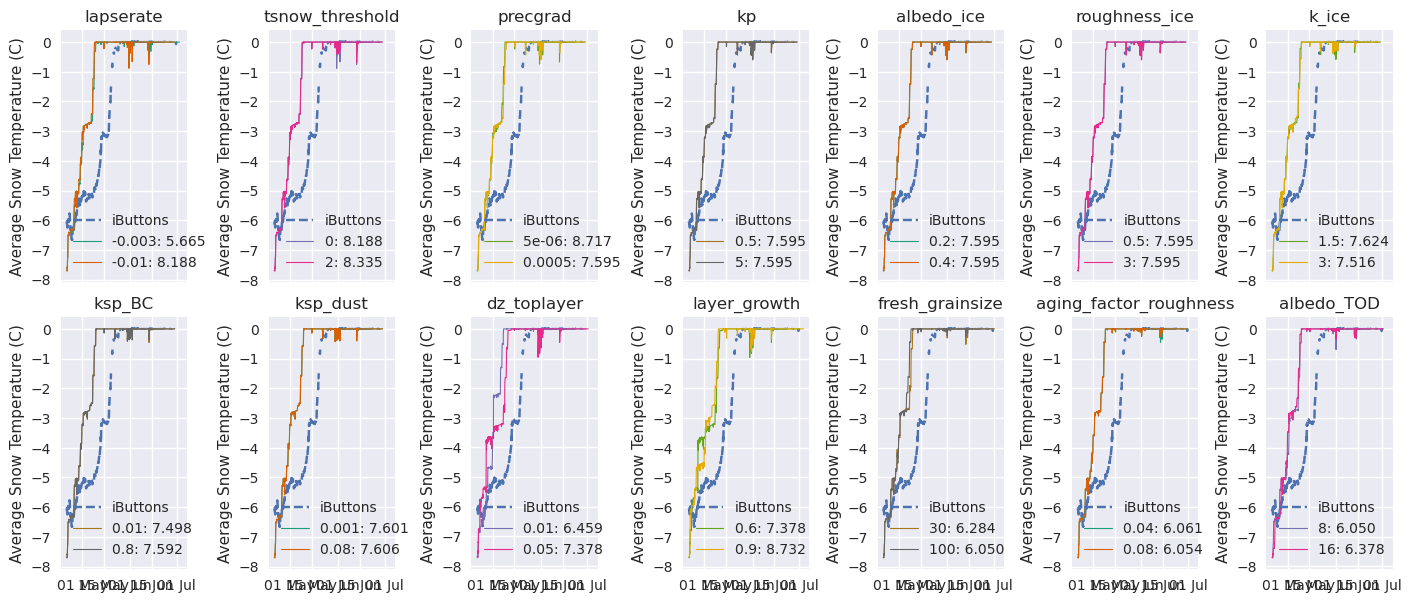

In [50]:
ds_list = list(ds_dict.values())
labels = list(ds_dict.keys())
panel_temp_compare(ds_list,[startdate,enddate],labels,temp_df)

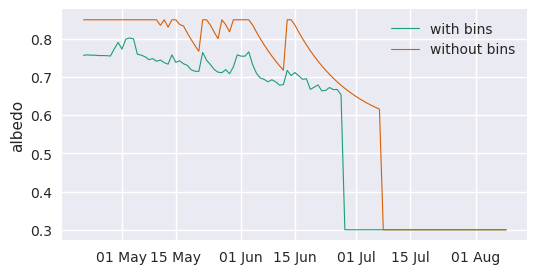

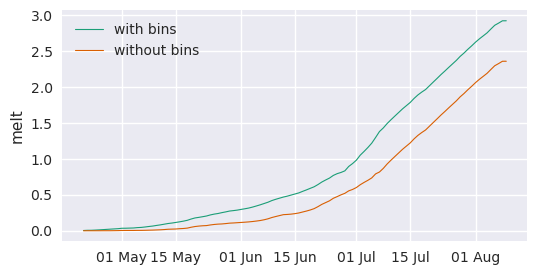

In [117]:
ds_base,startdate,enddate = getds('/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_01_22_0.nc')
ds_nolapbins,_,_ = getds('/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_01_22_noLAPbins.nc')
# ds__,_,_ = getds('/home/claire/research/PyGEM-EB/../Output/EB/Gulkana_2024_01_11_noLAPbins1.nc')
# ds_list = list(ds_dict.values())[0:5]
# labels = list(ds_dict.keys())[0:5]
compare_runs([ds_base,ds_nolapbins],[startdate,enddate],['with bins','without bins'],'albedo')
compare_runs([ds_base,ds_nolapbins],[startdate,enddate],['with bins','without bins'],'melt')

0 1
0 1


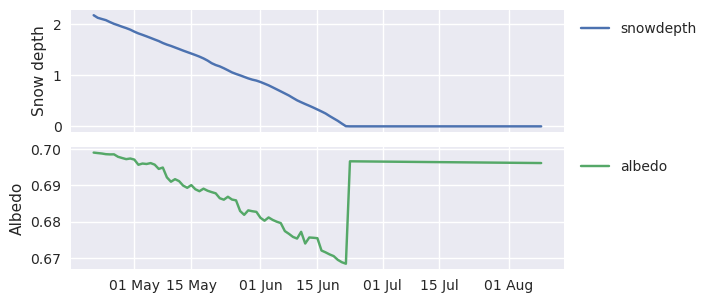

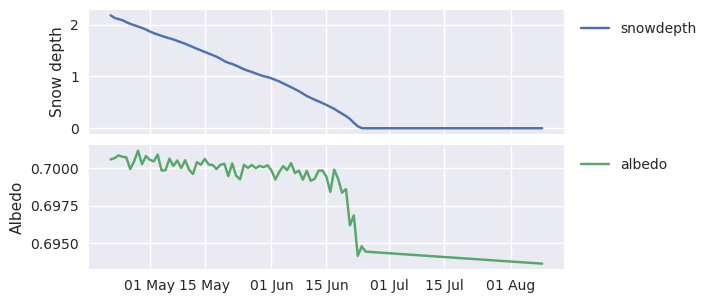

In [25]:
simple_plot(ds,0,[startdate,enddate],
            [['snowdepth'],['albedo']],
            t = '',
            skinny = True,
            new_y='accum',
            save_fig=False)
simple_plot(ds3,0,[startdate,enddate],
            [['snowdepth'],['albedo']],
            t = '',
            skinny = True,
            new_y='accum',
            save_fig=False)
print(ds.attrs['switch_melt'],ds.attrs['switch_LAPs'])
print(ds3.attrs['switch_melt'],ds3.attrs['switch_LAPs'])

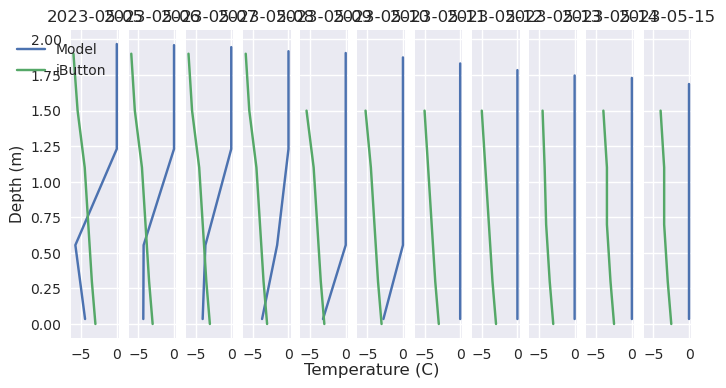

In [29]:
plot_iButtons(list(ds_list)[16],0,pd.date_range('05-05-2023 00:00','05-15-2023 00:00',freq='d'))

In [2]:
fp = '/home/claire/research/climate_data/AWS/Raw/on-Glacier/Zongo_surglacier_yrs.xlsx'
yrs = ['0405','0506','0607','0708','0809','0910','1011','1112','1213','1314','1415','1516','1617','1718','1819']
for yr in yrs:
    df = pd.read_excel(fp.replace('yrs',yr))
    if yr in ['0405']:
        df_all = df
    else:
        df_all = pd.concat([df_all,df])
print(df_all)

                                                SAMA Unnamed: 1  \
0                            Centrale Campbell CR10X        NaN   
1                    Programme : SAMA1_ORE_ZONGO.CR1        NaN   
2                                 Table : 30 minutes        NaN   
3                                   Glacier du Zongo        NaN   
4      Station météorologique "sur glacier" à 5050 m        NaN   
...                                              ...        ...   
35044                            2019-08-31 22:45:00          0   
35045                            2019-08-31 23:00:00          0   
35046                            2019-08-31 23:15:00          0   
35047                            2019-08-31 23:30:00          0   
35048                            2019-08-31 23:45:00          0   

               Année 2004-2005 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0      GLACIOCLIM (IRD - UMSA)        NaN        NaN        NaN        NaN   
1                          NaN        N